In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading and checking dataset

In [2]:
df = pd.read_csv("Dataset/Bengaluru_House_Data.csv")
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


Exploratory Data analysis (EDA)

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


checking and handling duplicates values

In [7]:
duplicates = df.duplicated(keep='first')
if duplicates.any():
    df.drop(df[duplicates].index, inplace=True)

In [8]:
df.shape

(12791, 9)

Dropping the less important features


In [9]:
df.drop(["area_type", "society", "balcony", "availability"], inplace=True, axis=1)

checking for missing values

In [10]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

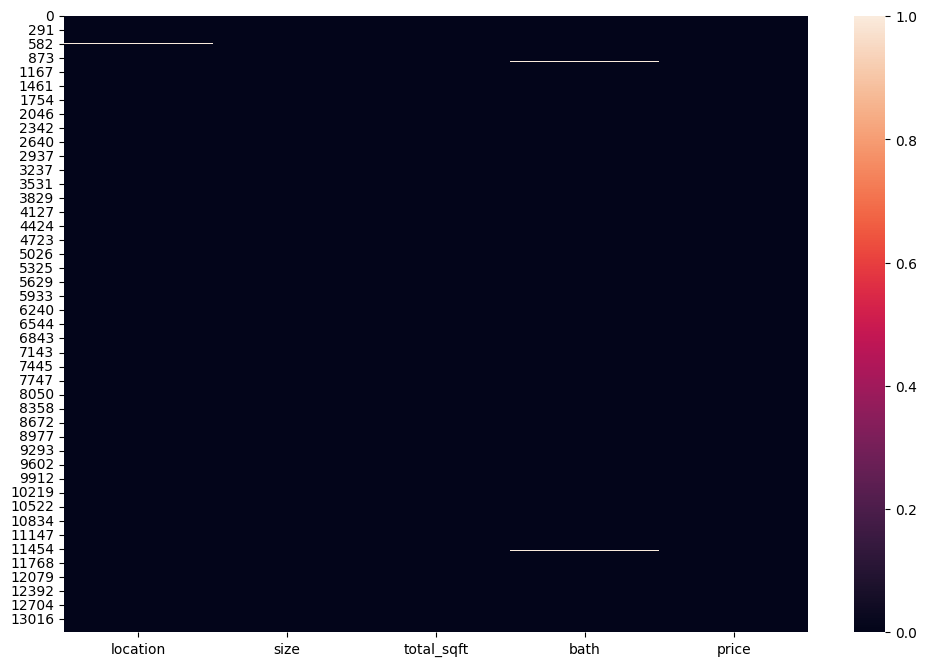

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna())
plt.show()

Handling the missing data

In [12]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['BHK'] = df['size'].apply(lambda x: int(x.split()[0]) if isinstance(x ,str) else x)
df['BHK'] = df['BHK'].fillna(df['BHK'].median())

df.drop(['size'], axis=1, inplace=True)

In [13]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [14]:
df['total_sqft'] = df['total_sqft'].apply(convert)

checking and handling the Outliers 

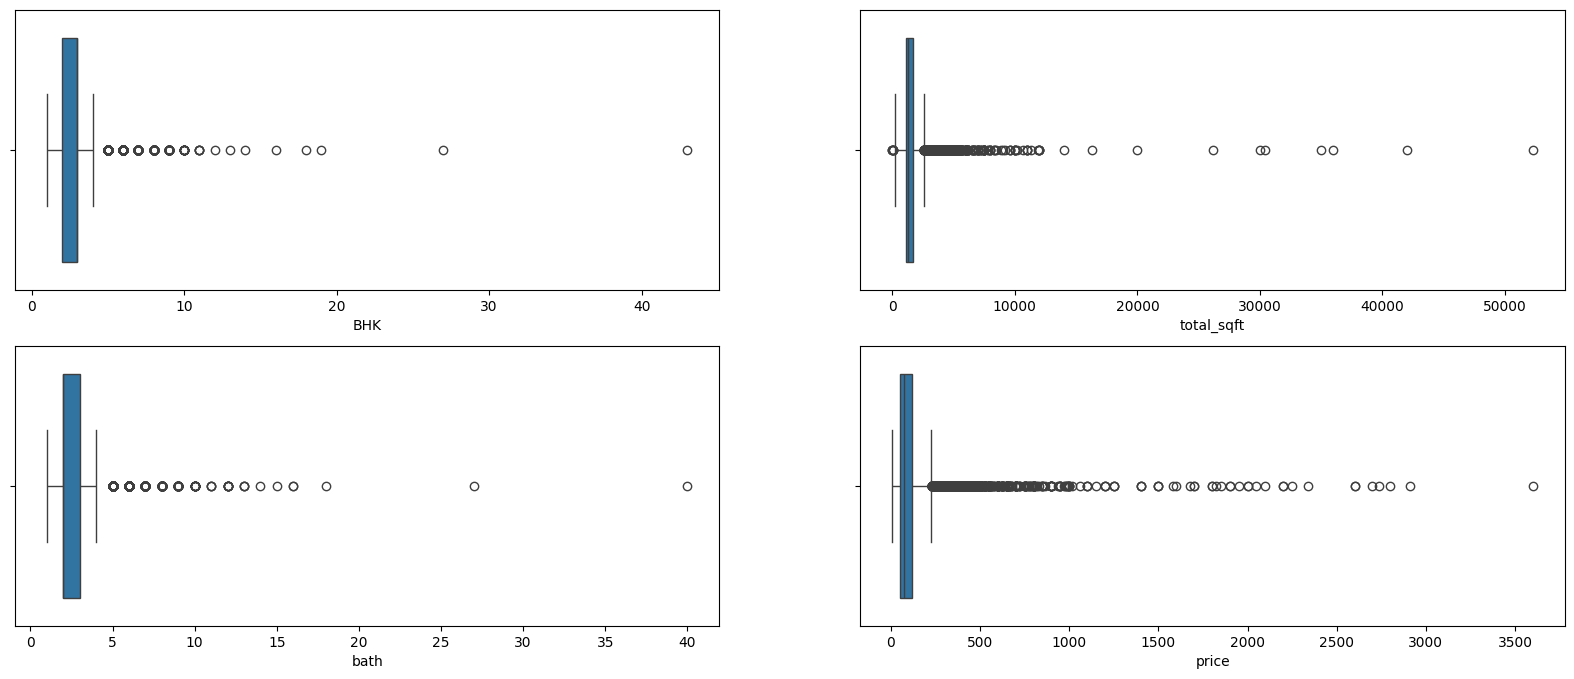

In [15]:
fig, ax = plt.subplots(2,2, figsize=(20,8))
plt.subplot(2,2,1)
sns.boxplot(df['BHK'], orient='h')
plt.subplot(2,2,2)
sns.boxplot(df['total_sqft'], orient='h')
plt.subplot(2,2,3)
sns.boxplot(df['bath'], orient='h')
plt.subplot(2,2,4)
sns.boxplot(df['price'], orient='h')
plt.show()

In [16]:
def remove_outliers(df, col_names):
    z_threshold = 3
    for col_name in col_names:
        mean = np.mean(df[col_name])
        std = np.std(df[col_name])
        df = df[(np.abs((df[col_name] - mean) / std) <= z_threshold)]
    return df


In [17]:
df = remove_outliers(df,['BHK','total_sqft','bath','price'])

Distribution plot of the total sqft

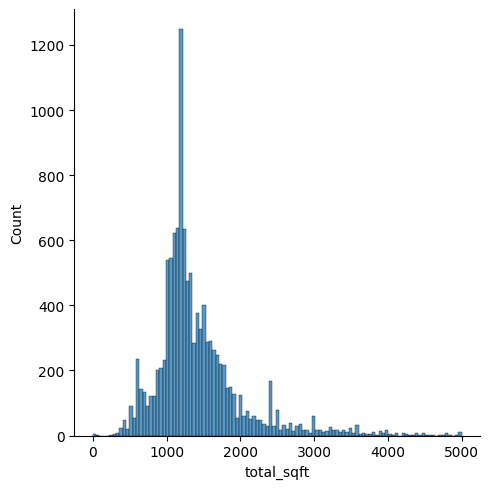

In [18]:
sns.displot(df['total_sqft'])
plt.show()

In [19]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield           488
Sarjapur  Road       353
Electronic City      287
Kanakpura Road       236
Thanisandra          227
                    ... 
N R Layout             1
Subbannaiah Palya      1
whitefiled             1
Sadduguntepalya        1
Abshot Layout          1
Name: count, Length: 1214, dtype: int64

In [20]:
len(location_stats[location_stats<=10])

1000

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Tindlu               10
Bommenahalli         10
Kodigehalli          10
Gunjur Palya         10
Shampura             10
                     ..
N R Layout            1
Subbannaiah Palya     1
whitefiled            1
Sadduguntepalya       1
Abshot Layout         1
Name: count, Length: 1000, dtype: int64

In [22]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

215

In [23]:
dummies = pd.get_dummies(df.location)

In [24]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df.drop(['location'], axis=1, inplace=True)

In [26]:
X = df.drop(['price'], axis=1)
y = df['price']

Train test data split

In [27]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=.2, random_state=42)

Model Training 

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'Linear Regression' : LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'AdaBoost Regressor ': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor()
}

In [29]:
def model_trainer(models, x_train, y_train, x_test, y_test):
    for model_name, model in models.items():
        print(f'{model_name} model')
        mdl = model.fit(x_train, y_train)
        y_pred = mdl.predict(x_test)
        print(f"{'*'*40} \nModel : {model_name} metrics")
        print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
        print(f"r2_score : {r2_score(y_test, y_pred):.2%} \n{'*'*40} \n")

In [30]:
model_trainer(models=models, x_train=x_tr, y_train=y_tr, x_test=x_te, y_test=y_te)

Linear Regression model
**************************************** 
Model : Linear Regression metrics
MAE : 25.44
r2_score : 65.93% 
**************************************** 

Ridge model
**************************************** 
Model : Ridge metrics
MAE : 25.33
r2_score : 65.99% 
**************************************** 

ElasticNet model
**************************************** 
Model : ElasticNet metrics
MAE : 27.59
r2_score : 58.82% 
**************************************** 

Lasso model
**************************************** 
Model : Lasso metrics
MAE : 27.39
r2_score : 59.61% 
**************************************** 

Decision Tree Regressor model
**************************************** 
Model : Decision Tree Regressor metrics
MAE : 25.37
r2_score : 56.24% 
**************************************** 

Random Forest Regressor model
**************************************** 
Model : Random Forest Regressor metrics
MAE : 23.43
r2_score : 64.64% 
*************************************

### The Best accuracy got by XGB Regressor Model with r2_score of 70.41%

In [31]:
# Hyper parameter turning

from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}


random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(x_tr, y_tr)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [32]:
random_search.best_params_

{'subsample': 0.9,
 'reg_lambda': 1.0,
 'reg_alpha': 0.5,
 'n_estimators': 500,
 'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [33]:
random_search.best_score_

0.7257625030065362

In [34]:
best_model = random_search.best_estimator_
best_model.fit(x_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = best_model.predict(x_te)
mae = mean_absolute_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)
print(f"Best MAE: {mae:.4f}")
print(f"Best R2_Score: {r2:.2%}")


Best MAE: 21.6544
Best R2_Score: 71.14%


In [36]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return f"₹{best_model.predict([x])[0]:.2f} Lakhs"

In [37]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

'₹72.93 Lakhs'

In [38]:
predict_price('Whitefield',500, 4, 4)

'₹93.24 Lakhs'

In [39]:
predict_price('Indira Nagar',1000, 4, 2)

'₹160.00 Lakhs'

In [40]:
predict_price('Yelahanka',1000, 3, 4) 

'₹111.35 Lakhs'

In [41]:
predict_price('Kengeri',1000, 3, 2) 

'₹68.64 Lakhs'